In [ ]:
augment_distance = 4
augment_distance*0.5*(3**0.5)

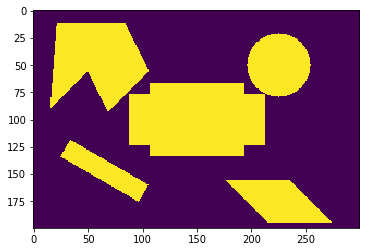

In [3]:
# ENPM 661 - Planning for Autonomous Robots
# Project 2 - Implementing Djikstra's Algorithm for imag rigid robot
# Team - Haixiang Fang          , UID - 116293242
#        Kulbir Singh Ahluwalia , UID - 116836050
import numpy as np
import math
import matplotlib.pyplot as plt

def find_line_slope_and_intercept(test_point_coord, line_point_1, line_point_2):
    slope = (line_point_2[1]-line_point_1[1])/(line_point_2[0]-line_point_1[0])
    intercept = line_point_1[1]-(slope*line_point_1[0])
    #print(slope,intercept)
    return slope, intercept

#function returns false when the point is outside the circle
def circular_obstacle(clearance, radius_rigid_robot, test_point_coord):
    circle_center = (225,150)
    test_point_coord_x = test_point_coord[0]
    test_point_coord_y = test_point_coord[1]
    augment_distance = radius_rigid_robot + clearance
    
    distance_from_center = ((test_point_coord_x - circle_center[0])**2 + (test_point_coord_y - circle_center[1])**2)**0.5
    
    if distance_from_center > (25+augment_distance):
        return False
    else:
        return True

#function returns false when the point is outside the ellipse
def ellipsoid_obstacle(clearance, radius_rigid_robot, test_point_coord):
    ellipsoid_center = (150,100)
    test_point_coord_x = test_point_coord[0]
    test_point_coord_y = test_point_coord[1]
    augment_distance = radius_rigid_robot + clearance
    semi_major_axis = 40
    semi_minor_axis = 20

    distance_from_center = ((test_point_coord_x - ellipsoid_center[0])**2) / ((semi_major_axis+augment_distance)**2) + (test_point_coord_y - ellipsoid_center[1])**2 / ((semi_minor_axis+augment_distance)**2)

    if distance_from_center > 1:
        return False
    else:
        return True

def rectangle_obstacle(clearance, radius_rigid_robot, test_point_coord):

    circle_center = (225,150)
    augment_distance = radius_rigid_robot + clearance

    rectangle_point_1 = [100,38.66025]
    rectangle_point_2 = [35.0481, 76.1603]
    rectangle_point_3 = [30.0481, 67.5]
    rectangle_point_4 = [95,30]
    
    #We set the flags by testing for image point inside the rectangle
    #Because the sign for the half plane is unique for every line, we test it by using image point that is confirmed to be inside the rectangle
    edge1_m_c = find_line_slope_and_intercept(test_point_coord,rectangle_point_1,rectangle_point_2)
    line1 = test_point_coord[1] - (edge1_m_c[0]*test_point_coord[0]) - (edge1_m_c[1] + (augment_distance*2/(3**0.5)))
    #print(line1)
    if line1>=0:
        flag1 = False
        #print("False")
    else:
        flag1 = True
        #print("True")
        
    
    edge2_m_c = find_line_slope_and_intercept(test_point_coord,rectangle_point_2,rectangle_point_3)
    line2 = test_point_coord[1] - (edge2_m_c[0]*test_point_coord[0]) - (edge2_m_c[1] + (augment_distance*2))
    #print(line2)
    if line2>=0:
        flag2 = False
        #print("False")
    else:
        flag2 = True
        #print("True")
    
    
    edge3_m_c = find_line_slope_and_intercept(test_point_coord,rectangle_point_3,rectangle_point_4)
    line3 = test_point_coord[1] - (edge3_m_c[0]*test_point_coord[0]) - (edge3_m_c[1] - (augment_distance*2/(3**0.5)))
    #print(line3)
    if line3>=0:
        flag3 = True
        #print("True")
    else:
        flag3 = False
        #print("False")
    
    
    edge4_m_c = find_line_slope_and_intercept(test_point_coord,rectangle_point_4,rectangle_point_1)
    line4 = test_point_coord[1] - (edge4_m_c[0]*test_point_coord[0]) - (edge4_m_c[1] - (augment_distance*2))
    #print(line4)
    if line4>=0:
        flag4 = True
        #print("True")
    else:
        flag4 = False
        #print("False")
        
    if flag1 and flag2 and flag3 and flag4:
        return True
    else:
        return False

def rhombus_obstacle(clearance, radius_rigid_robot, test_point_coord):

    augment_distance = radius_rigid_robot + clearance

    rhombus_point_1 = [250,25]
    rhombus_point_2 = [225,40]
    rhombus_point_3 = [200,25]
    rhombus_point_4 = [225,10]
    
    #We set the flags by testing for image point inside the rectangle
    #Because the sign for the half plane is unique for every line, we test it by using image point that is confirmed to be inside the rectangle
    edge1_m_c = find_line_slope_and_intercept(test_point_coord,rhombus_point_1, rhombus_point_2)
    line1 = test_point_coord[1] - (edge1_m_c[0]*test_point_coord[0]) - (edge1_m_c[1] + (augment_distance/0.8575))
    #print(line1)
    if line1>=0:
        flag1 = False
    else:
        flag1 = True
        
    
    edge2_m_c = find_line_slope_and_intercept(test_point_coord,rhombus_point_2,rhombus_point_3)
    line2 = test_point_coord[1] - (edge2_m_c[0]*test_point_coord[0]) - (edge2_m_c[1] + (augment_distance/0.8575))
    #print(line2)
    if line2>=0:
        flag2 = False
    else:
        flag2 = True
    
    
    edge3_m_c = find_line_slope_and_intercept(test_point_coord,rhombus_point_3,rhombus_point_4)
    line3 = test_point_coord[1] - (edge3_m_c[0]*test_point_coord[0]) - (edge3_m_c[1] - (augment_distance/0.8575))
    #print(line3)
    if line3>=0:
        flag3 = True
    else:
        flag3 = False
    
    
    edge4_m_c = find_line_slope_and_intercept(test_point_coord,rhombus_point_4,rhombus_point_1)
    line4 = test_point_coord[1] - (edge4_m_c[0]*test_point_coord[0]) - (edge4_m_c[1] - (augment_distance/0.8575))
    #print(line4)
    if line4>=0:
        flag4 = True
    else:
        flag4 = False
        
    if flag1 and flag2 and flag3 and flag4:
        return True
    else:
        return False

def nonconvex_obstacle_right_half(clearance, radius_rigid_robot, test_point_coord):

    augment_distance = radius_rigid_robot + clearance

    nonconvex_point_1 = [100,150]
    nonconvex_point_2 = [75,185]
    nonconvex_point_3 = [60,185]
    nonconvex_point_4 = [50,150]
    nonconvex_point_5 = [75,120]
    
    #We set the flags by testing for image point inside the rectangle
    #Because the sign for the half plane is unique for every line, we test it by using image point that is confirmed to be inside the nonconvex_obstacle
    edge1_m_c = find_line_slope_and_intercept(test_point_coord,nonconvex_point_1, nonconvex_point_2)
    line1 = test_point_coord[1] - (edge1_m_c[0]*test_point_coord[0]) - (edge1_m_c[1] + (augment_distance/0.58124))
    #print(line1)
    if line1>=0:
        flag1 = False
        # print("False")
    else:
        flag1 = True
        # print("True")
        
    
    edge2_m_c = find_line_slope_and_intercept(test_point_coord,nonconvex_point_2,nonconvex_point_3)
    line2 = test_point_coord[1] - (edge2_m_c[0]*test_point_coord[0]) - (edge2_m_c[1] + (augment_distance/1))
    #print(line2)
    if line2>=0:
        flag2 = False
        # print("False")
    else:
        flag2 = True
        # print("True")
    
    #edge 3 is not augmented with clearance+robot_radius since its inside the nonconvex polygon
    edge3_m_c = find_line_slope_and_intercept(test_point_coord,nonconvex_point_3,nonconvex_point_4)
    line3 = test_point_coord[1] - (edge3_m_c[0]*test_point_coord[0]) - (edge3_m_c[1] + (augment_distance/0.27472))
    #print(line3)
    if line3>=0:
        flag3 = False
        # print("False")
    else:
        flag3 = True
        # print("True")
    
    
    edge4_m_c = find_line_slope_and_intercept(test_point_coord,nonconvex_point_4,nonconvex_point_5)
    line4 = test_point_coord[1] - (edge4_m_c[0]*test_point_coord[0]) - (edge4_m_c[1] - (augment_distance/0.64018))
    #print(line4)
    if line4>=0:
        flag4 = True
        # print("True")
    else:
        flag4 = False
        # print("False")

    edge5_m_c = find_line_slope_and_intercept(test_point_coord,nonconvex_point_5,nonconvex_point_1)
    line5 = test_point_coord[1] - (edge5_m_c[0]*test_point_coord[0]) - (edge5_m_c[1] - (augment_distance/0.640184))
    #print(line4)
    if line5>=0:
        flag5 = True
        # print("True")
    else:
        flag5 = False
        # print("False")


        
    if flag1 and flag2 and flag3 and flag4 and flag5:
        return True
    else:
        return False

def nonconvex_obstacle_left_half(clearance, radius_rigid_robot, test_point_coord):

    augment_distance = radius_rigid_robot + clearance

    nonconvex_point_1 = [50,150]
    nonconvex_point_2 = [60,185]
    nonconvex_point_3 = [25,185]
    nonconvex_point_4 = [20,120]  
    
    #We set the flags by testing for image point inside the rectangle
    #Because the sign for the half plane is unique for every line, we test it by using image point that is confirmed to be inside the nonconvex_obstacle
    edge1_m_c = find_line_slope_and_intercept(test_point_coord,nonconvex_point_1, nonconvex_point_2)
    line1 = test_point_coord[1] - (edge1_m_c[0]*test_point_coord[0]) - (edge1_m_c[1] - (augment_distance/0.27472))
    #print(line1)
    if line1>=0:
        flag1 = True
        # print("True")
    else:
        flag1 = False
        # print("False")
        
    
    edge2_m_c = find_line_slope_and_intercept(test_point_coord,nonconvex_point_2,nonconvex_point_3)
    line2 = test_point_coord[1] - (edge2_m_c[0]*test_point_coord[0]) - (edge2_m_c[1] + (augment_distance/1))
    #print(line2)
    if line2>=0:
        flag2 = False
        # print("False")
    else:
        flag2 = True
        # print("True")
    
    #edge 3 is not augmented with clearance+robot_radius since its inside the nonconvex polygon
    edge3_m_c = find_line_slope_and_intercept(test_point_coord,nonconvex_point_3,nonconvex_point_4)
    line3 = test_point_coord[1] - (edge3_m_c[0]*test_point_coord[0]) - (edge3_m_c[1] + (augment_distance/0.0767))
    #print(line3)
    if line3>=0:
        flag3 = False
        # print("False")
    else:
        flag3 = True
        # print("True")
    
    
    edge4_m_c = find_line_slope_and_intercept(test_point_coord,nonconvex_point_4,nonconvex_point_1)
    line4 = test_point_coord[1] - (edge4_m_c[0]*test_point_coord[0]) - (edge4_m_c[1] - (augment_distance/0.7071))
    #print(line4)
    if line4>=0:
        flag4 = True
        # print("True")
    else:
        flag4 = False
        # print("False")
        
    if flag1 and flag2 and flag3 and flag4:
        return True
    else:
        return False

def test_point_obstacle_check(clearance, radius_rigid_robot, test_point_coord):
    if circular_obstacle(clearance, radius_rigid_robot, test_point_coord):
        return True
    elif ellipsoid_obstacle(clearance, radius_rigid_robot, test_point_coord):
        return True
    elif rectangle_obstacle(clearance, radius_rigid_robot, test_point_coord):
        return True
    elif rhombus_obstacle(clearance, radius_rigid_robot, test_point_coord):
        return True
    elif nonconvex_obstacle_right_half(clearance, radius_rigid_robot, test_point_coord):
        return True
    elif nonconvex_obstacle_left_half(clearance, radius_rigid_robot, test_point_coord):
        return True
    else:
        return False


def cart2img(ix):
    return [ix[0],200-ix[1]]


# def dijkstra(clearance, radius_rigid_robot, test_point_coord):















# radius_rigid_robot = int(input("Enter the radius of the rigid robot \n"))
# clearance = int(input("Enter the desired clearance for the rigid robot\n"))
# #Uncomment to choose different positions:-
# start_node_x = int(input("Enter the starting x coordinate for the rigid robot\n"))
# start_node_y = int(input("Enter the starting y coordinate for the rigid robot\n"))
# goal_node_x = int(input("Enter the goal x coordinate for the rigid robot\n"))
# goal_node_y = int(input("Enter the goal y coordinate for the rigid robot\n"))
# 
#     # opencv_start_node_y = 200- start_node_y
#     # opencv_goal_node_y = 200 - goal_node_y
# 
# if (start_node_x < 0 and start_node_x > 300) and (goal_node_x < 0 and goal_node_x > 300):
#     print("X coordinate is out of range. Enter x from [0,300]. Restart program!")
#     exit(0)
# 
# if (start_node_y < 0 and start_node_y > 200) and (goal_node_y < 0 and goal_node_y > 200):
#     print("Y coordinate is out of range. Enter y from [0,200]. Restart program!")
#     exit(0)
# 
# def check_inputs_wrt_obstacles(start_node_x,start_node_y, goal_node_x,goal_node_y):
#     if test_point_obstacle_check(clearance, radius_rigid_robot, [start_node_x,start_node_y]):
#         print("Start node is inside an obstacle. Enter some other coordinates. Restart program!")
#         exit(0)
# 
#     if test_point_obstacle_check(clearance, radius_rigid_robot, [goal_node_x,goal_node_y]):
#         print("Goal node is inside an obstacle. Enter some other coordinates. Restart program!")
#         exit(0)



# Running the Code and using all the functions we made:-

# check_inputs_wrt_obstacles(start_node_x,start_node_y, goal_node_x,goal_node_y)

# print(test_point_obstacle_check(0,0,[230,40]))

def plot_map():
    image = np.zeros((200,300),np.uint8)

    r = 2
    c =2
    # print("Circle: ", circular_obstacle(r, c, [225, 150]))

    for i in range(0,299):
        for j in range(0,199):
            # print("For Loop")
            idx = cart2img([i,j])
            # print("Circle: ", circular_obstacle(r, c, [225, 150]))
            if circular_obstacle(r,c,[idx[0],idx[1]]) == True:
                # print("Circle: ",i,j)
                image[j,i]=1

            if ellipsoid_obstacle(r,c,[idx[0],idx[1]])==True:
                # print("Circle: ",i,j)
                image[j,i]=1

            if rhombus_obstacle(r,c,[idx[0],idx[1]])==True:
                # print("Circle: ",i,j)
                image[j,i]=1

            if rectangle_obstacle(r,c,[idx[0],idx[1]])==True:
                # print("Circle: ",i,j)
                image[j,i]=1

            if nonconvex_obstacle_right_half(r,c,[idx[0],idx[1]])==True:
                # print("Circle: ",i,j)
                image[j,i]=1

            if nonconvex_obstacle_left_half(r, c, [idx[0], idx[1]]) == True:
                # print("Circle: ", i, j)
                image[j, i] = 1
            # image[np.where(image==255)]=True
            # image[np.where(image==0)]=False
    return image


def main():
    image = plot_map()
    plt.imshow(image)
    plt.show()
#
if __name__=="__main__":
    main()




In [ ]:
def djikstra_algo(image, robo1, resol):

    dimension = robo1.dim
    clearance = robo1.clear
    start_node_pos = robo1.int_pos
    goal_node_pos = robo1.final_pos

    image[start_node_pos[1], start_node_pos[0]] = [0, 255, 0]
    image[goal_node_pos[1], goal_node_pos[0]] = [0, 0, 255]
    start_node = Node(start_node_pos)
    start_node.cost = 0

    entry_points = count_entry_points(goal_node_pos)
    print("Entry points", entry_points)
    visited = list()
    queue = [start_node]
    actions = ["up", "down", "left", "right", "up_right", "down_right", "up_left", "down_left"]
    counter = 0

    while queue:
        current_node = pop_queue_element(queue)
        current_point = current_node.point
        visited.append(str(current_point))

        if counter == entry_points:
            return new_node.parent, image
               
        for action in actions:
            new_point, base_cost = generate_node_location(action, current_point, dimension, clearance, poly_points_updated)
            if new_point is not None:
                if new_point == goal_node_pos:
                    if counter < entry_points:
                        counter += 1
                        print("Goal reached", counter)

                new_node = Node(new_point)
                new_node.parent = current_node

                image = color_pixel(image, current_node.point)
                image[start_node_pos[1], start_node_pos[0]] = [0, 255, 0]
                image[goal_node_pos[1], goal_node_pos[0]] = [0, 0, 255]

                resized_new_1 = cv2.resize(image, None, fx=resol, fy=resol, interpolation=cv2.INTER_CUBIC)
                cv2.imshow("Figure", resized_new_1)
                cv2.waitKey(1)

                if str(new_point) not in visited:
                    new_node.cost = base_cost + new_node.parent.cost
                    visited.append(str(new_node.point))
                    queue.append(new_node)
                else:
                    node_exist_index = find_node(new_point, queue)
                    if node_exist_index is not None:
                        temp_node = queue[node_exist_index]
                        if temp_node.cost > base_cost + new_node.parent.cost:
                           temp_node.cost = base_cost + new_node.parent.cost
                           temp_node.parent = current_node
            else:
                continue
    return None, None
